# Linear Regression

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [3]:
data = pd.read_csv('Ecommerce Customers')

In [4]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
data.tail()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510
499,hannahwilson@davidson.com,49791 Rachel Heights Apt. 898\nEast Drewboroug...,DarkMagenta,33.715981,12.418808,35.771016,2.735160,497.778642


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [7]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


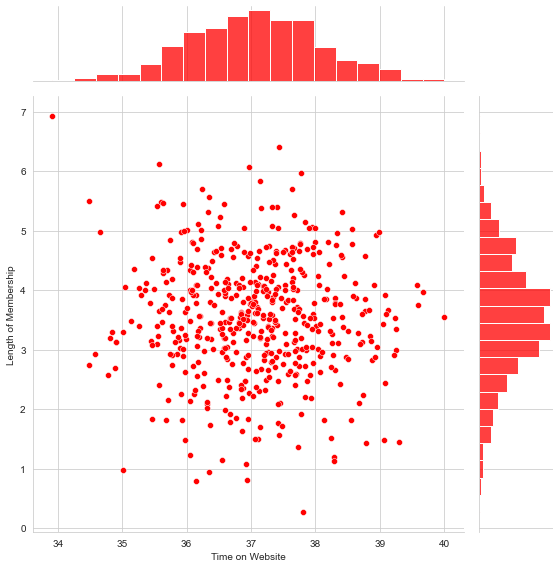

In [8]:
sns.set_style('whitegrid')
sns.jointplot(x='Time on Website', y='Length of Membership', data=data, color='red', height=8, )

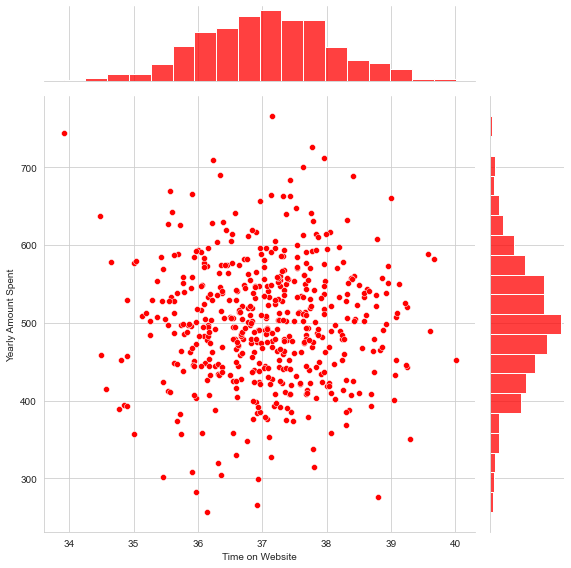

In [9]:
sns.set_style('whitegrid')
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=data, color='red', height=8, )

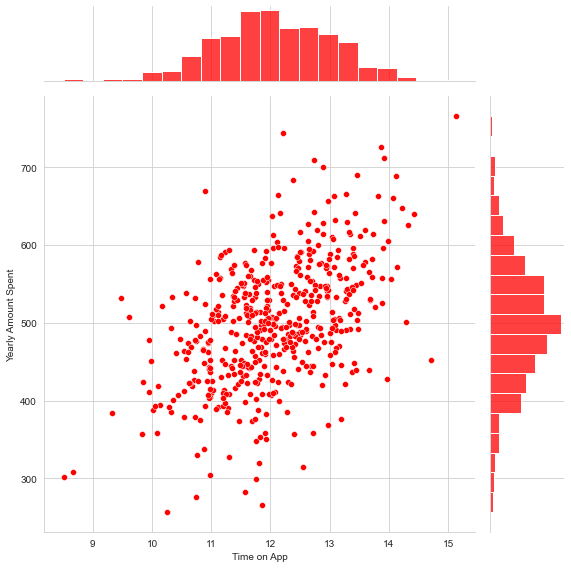

In [10]:
sns.set_style('whitegrid')
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=data, color='red', height=8)

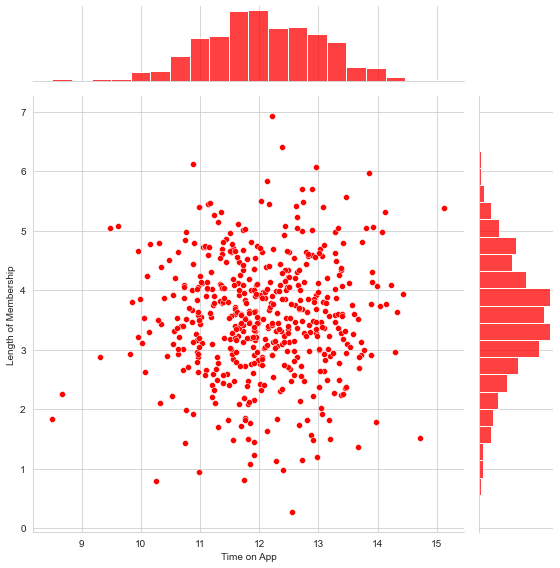

In [11]:
sns.set_style('whitegrid')
sns.jointplot(x='Time on App', y='Length of Membership', data=data, color='red', height=8, )

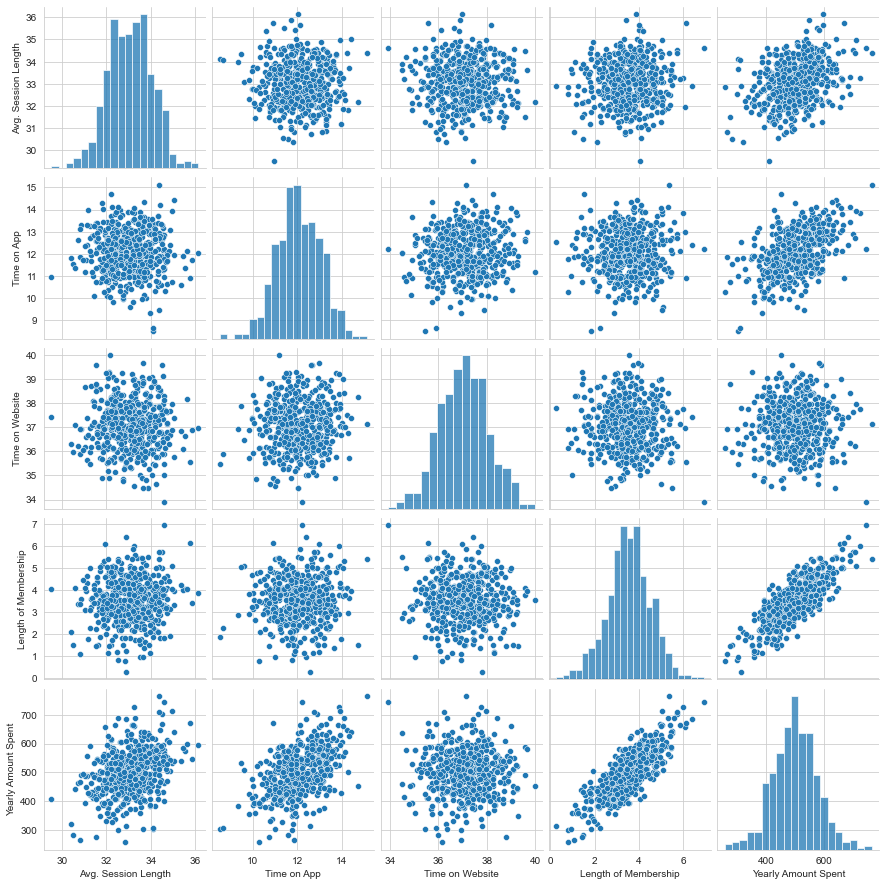

In [12]:
sns.pairplot(data)

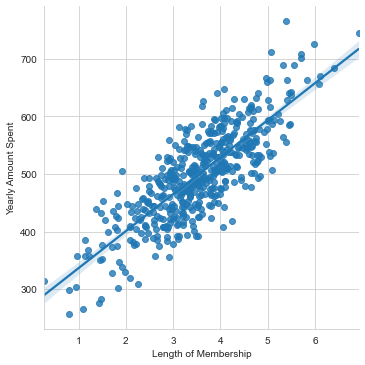

In [13]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=data)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = data[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y = data['Yearly Amount Spent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lm = LinearRegression()

In [18]:
lm.fit(X_train, y_train)

LinearRegression()

In [19]:
lm.coef_

array([25.70676165, 38.57260842,  0.62520092, 61.71767604])

In [20]:
lm.intercept_

-1056.072059308139

In [21]:
prediction = lm.predict(X_test)

<AxesSubplot:xlabel='Yearly Amount Spent'>

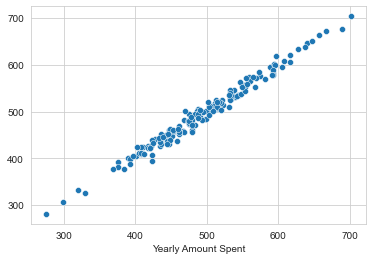

In [22]:
sns.scatterplot(x = y_test, y = prediction)

In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [24]:
print('MAE: ', mean_absolute_error(y_test, prediction))
print('MSE: ', mean_squared_error(y_test, prediction))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, prediction)))

MAE:  8.353573525017568
MSE:  102.4042865993193
RMSE:  10.119500313717042


<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Count'>

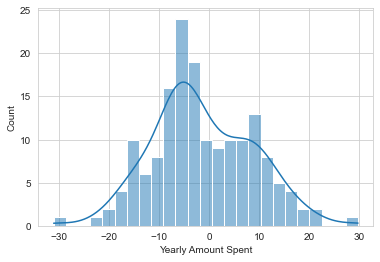

In [25]:
sns.histplot(y_test-prediction, bins=25, kde=True)

In [26]:
df2 = pd.DataFrame({'Actual':y_test, 'Predict Value':prediction})

In [27]:
df2.head(5)

,Actual,Predict Value
361,401.033135,404.067619
73,534.777188,542.585439
374,418.602742,427.348848
155,503.978379,502.018383
104,410.069611,410.353875


In [28]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.706762
Time on App,38.572608
Time on Website,0.625201
Length of Membership,61.717676
